In [56]:
#pip install fitter

In [57]:
import pandas as pd
import os
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from scipy.stats import burr
from scipy.stats import lognorm
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from sympy import *
init_printing()
dataset = pd.read_csv('datamerged2.csv')

In [4]:
t1 = dataset.treatment == 1
treatment1 = dataset[t1]

subset1 = treatment1.query("round==2 or round==3")

irrational1 = treatment1.query("value>27.5")
irrational2 = subset1.query("value>27.5")
irrational3 = treatment1.query("value>35")
irrational4 = subset1.query("value>35")

t1_nozero = treatment1.query("value>0")
t1_nooutlier = treatment1.query("value>=4.1 and value<=35")



In [31]:
t1_nozero.describe()

,id,treatment,tofrom,value,role,resp,round,rounds,old
count,766.000000,766.0,766.000000,766.000000,766.0,766.000000,766.000000,766.000000,766.00000
mean,121.328982,1.0,131.954308,20.326084,0.0,0.778068,1.648825,2.291123,0.85248
std,84.457106,0.0,88.389892,7.512386,0.0,0.415817,0.651327,0.454577,0.70695
min,1.000000,1.0,6.000000,1.000000,0.0,0.000000,1.000000,2.000000,0.00000
25%,22.500000,1.0,26.250000,15.000000,0.0,1.000000,1.000000,2.000000,0.00000
50%,137.000000,1.0,149.000000,20.000000,0.0,1.000000,2.000000,2.000000,1.00000
75%,162.000000,1.0,177.000000,25.000000,0.0,1.000000,2.000000,3.000000,1.00000
max,250.000000,1.0,274.000000,49.000000,0.0,1.000000,3.000000,3.000000,2.00000


In [4]:
subset1.describe()

,id,treatment,tofrom,value,role,resp,round,rounds,old
count,422.000000,422.0,422.000000,422.000000,422.0,422.000000,422.000000,422.000000,422.000000
mean,124.805687,1.0,135.838863,20.284550,0.0,0.819905,2.177725,2.355450,0.867299
std,81.297525,0.0,85.181224,6.608621,0.0,0.384722,0.382735,0.479218,0.676319
min,1.000000,1.0,6.000000,4.200000,0.0,0.000000,2.000000,2.000000,0.000000
25%,25.000000,1.0,28.000000,15.000000,0.0,1.000000,2.000000,2.000000,0.000000
50%,152.000000,1.0,167.000000,20.000000,0.0,1.000000,2.000000,2.000000,1.000000
75%,162.000000,1.0,177.000000,25.000000,0.0,1.000000,2.000000,3.000000,1.000000
max,250.000000,1.0,274.000000,45.000000,0.0,1.000000,3.000000,3.000000,2.000000


In [8]:
irrational1.describe()

,id,treatment,tofrom,value,role,resp,round,rounds,old
count,123.000000,123.0,123.000000,123.000000,123.0,123.000000,123.000000,123.000000,123.000000
mean,144.723577,1.0,156.813008,30.956911,0.0,0.983740,1.422764,2.292683,1.048780
std,72.766334,0.0,76.080776,3.814469,0.0,0.126992,0.543337,0.456855,0.638308
min,3.000000,1.0,6.000000,27.700001,0.0,0.000000,1.000000,2.000000,0.000000
25%,130.000000,1.0,142.500000,29.950000,0.0,1.000000,1.000000,2.000000,1.000000
50%,153.000000,1.0,167.000000,30.000000,0.0,1.000000,1.000000,2.000000,1.000000
75%,165.000000,1.0,179.500000,30.000000,0.0,1.000000,2.000000,3.000000,1.000000
max,247.000000,1.0,274.000000,49.000000,0.0,1.000000,3.000000,3.000000,2.000000


In [9]:
irrational2.describe()

,id,treatment,tofrom,value,role,resp,round,rounds,old
count,49.000000,49.0,49.000000,49.000000,49.0,49.0,49.000000,49.000000,49.000000
mean,167.387755,1.0,181.653061,30.830612,0.0,1.0,2.061224,2.306122,1.244898
std,50.857979,0.0,53.888601,3.720674,0.0,0.0,0.242226,0.465657,0.480044
min,22.000000,1.0,11.000000,27.700001,0.0,1.0,2.000000,2.000000,0.000000
25%,131.000000,1.0,145.000000,30.000000,0.0,1.0,2.000000,2.000000,1.000000
50%,156.000000,1.0,170.000000,30.000000,0.0,1.0,2.000000,2.000000,1.000000
75%,242.000000,1.0,251.000000,30.000000,0.0,1.0,2.000000,3.000000,2.000000
max,247.000000,1.0,274.000000,45.000000,0.0,1.0,3.000000,3.000000,2.000000


In [24]:
irrational3.describe()

,id,treatment,tofrom,value,role,resp,round,rounds,old
count,10.00000,10.0,10.000000,10.000000,10.0,10.000000,10.000000,10.000000,10.000000
mean,95.10000,1.0,105.400000,42.010000,0.0,0.900000,1.400000,2.300000,0.600000
std,64.71038,0.0,68.686405,4.469265,0.0,0.316228,0.516398,0.483046,0.516398
min,20.00000,1.0,18.000000,36.400002,0.0,0.000000,1.000000,2.000000,0.000000
25%,22.00000,1.0,32.000000,38.000000,0.0,1.000000,1.000000,2.000000,0.000000
50%,128.00000,1.0,140.000000,42.200001,0.0,1.000000,1.000000,2.000000,1.000000
75%,151.25000,1.0,165.500000,45.000000,0.0,1.000000,2.000000,2.750000,1.000000
max,161.00000,1.0,174.000000,49.000000,0.0,1.000000,2.000000,3.000000,1.000000


In [26]:
irrational4.describe()

,id,treatment,tofrom,value,role,resp,round,rounds,old
count,4.00,4.0,4.000000,4.000000,4.0,4.0,4.0,4.00,4.0
mean,136.25,1.0,150.250000,42.000000,0.0,1.0,2.0,2.25,1.0
std,16.50,0.0,15.129992,3.559026,0.0,0.0,0.0,0.50,0.0
min,128.00,1.0,139.000000,38.000000,0.0,1.0,2.0,2.00,1.0
25%,128.00,1.0,140.500000,39.500000,0.0,1.0,2.0,2.00,1.0
50%,128.00,1.0,145.000000,42.500000,0.0,1.0,2.0,2.00,1.0
75%,136.25,1.0,154.750000,45.000000,0.0,1.0,2.0,2.25,1.0
max,161.00,1.0,172.000000,45.000000,0.0,1.0,2.0,3.00,1.0


In [17]:
t1_nooutlier.describe()

,id,treatment,tofrom,value,role,resp,round,rounds,old
count,730.000000,730.0,730.000000,730.000000,730.0,730.000000,730.000000,730.000000,730.000000
mean,123.090411,1.0,133.734247,19.880384,0.0,0.776712,1.671233,2.289041,0.868493
std,84.847059,0.0,88.791431,6.747559,0.0,0.416735,0.653256,0.453628,0.711820
min,1.000000,1.0,6.000000,4.200000,0.0,0.000000,1.000000,2.000000,0.000000
25%,24.000000,1.0,26.250000,15.000000,0.0,1.000000,1.000000,2.000000,0.000000
50%,137.500000,1.0,149.500000,20.000000,0.0,1.000000,2.000000,2.000000,1.000000
75%,163.000000,1.0,178.000000,25.000000,0.0,1.000000,2.000000,3.000000,1.000000
max,250.000000,1.0,274.000000,30.000000,0.0,1.000000,3.000000,3.000000,2.000000


In [71]:
(mu, sigma) = norm.fit(s)
mu, sigma

Turn data into an array

In [68]:
s = t1_nozero["value"].values

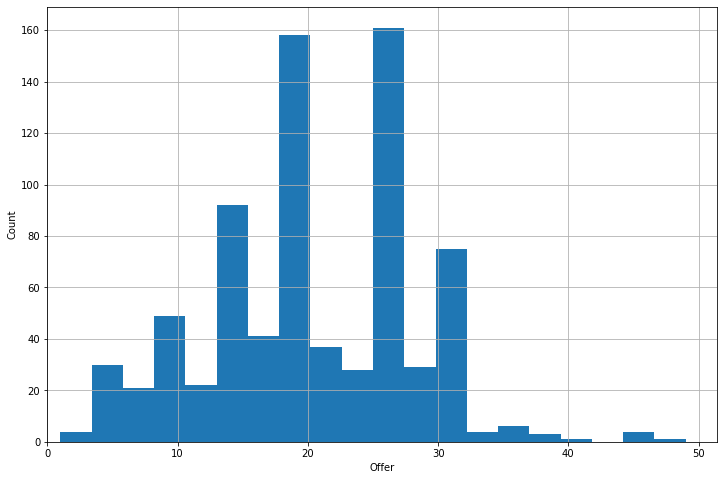

In [85]:
plt.subplots(figsize=(12, 8))
plt.hist(s, bins=20)
plt.xlim(left=0)
plt.grid()
plt.xlabel('Offer')
plt.ylabel('Count')
plt.show()

Finding optimal mean and std for lognorm dist based on data. Formulas comes from deriv of LL fn

In [67]:
n=len(s)
mean = (1/n)*np.log(s).sum()
var =(1/n)*(((np.log(s)-mean)**2).sum())
std = np.sqrt(var)
print(var)
print(std)
print(mean)

0.23014492221007266
0.4797342203867394
2.9193719179548485


Gen random lognorm data with the above mean and std to compare our data to actual lognorm dist

In [80]:
mean = 2.9193719179548485
std = 0.4797342203867394
rd = np.random.lognormal(mean, std, 766)

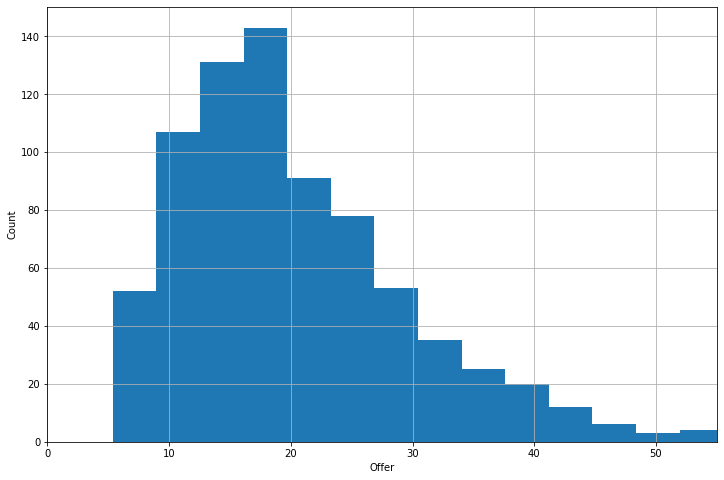

In [94]:
plt.subplots(figsize=(12, 8))
plt.hist(rd, bins=30)
plt.xlim(right=55)
plt.grid()
plt.xlabel('Offer')
plt.ylabel('Count')
plt.show()


Attempt at a chisqare test, not an ideal test statistic

In [36]:
def chisquare(observed_values,expected_values):
    test_statistic=0
    for observed, expected in zip(observed_values, expected_values):
        test_statistic+=(float(observed)-float(expected))**2/float(expected)
    return test_statistic


In [73]:
z= chisquare(s,f)
z

Attempt at kstest

In [74]:
dist = getattr(stats, 'lognorm')
parameters = dist.fit(s)
print(parameters)

(0.010918513881929548, -666.7819826182324, 687.0496119818081)


In [75]:
stats.kstest(t1_nooutlier.value, "lognorm", parameters)

KstestResult(statistic=0.1119356112980367, pvalue=1.249323876486832e-08)

Messing around with some fitting

,sumsquare_error,aic,bic,kl_div
burr,0.253604,991.579127,-6111.518981,inf
beta,0.254705,990.663776,-6108.201140,inf
norm,0.255076,970.346181,-6120.369048,inf
lognorm,0.255259,968.085321,-6113.176924,inf
gamma,0.255345,961.832203,-6112.918870,inf


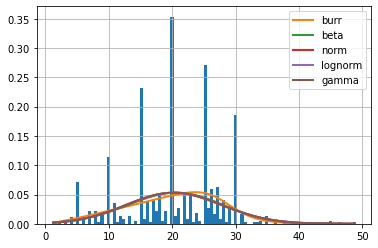

In [88]:
f = Fitter(s,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [90]:
f.get_best(method = 'sumsquare_error')

{'burr': {'c': 12.379571305792416,
  'd': 0.17091724635980587,
  'loc': 0.3256731187389963,
  'scale': 28.51367452121444}}

In [79]:
n=len(s)
mean = np.linspace(2.7, 3, 100)
std=0.4797342203867394
LL = -1*(-(n/2)*np.log(2*np.pi) - (n/2)*np.log(std**2) - (1/(2*std**2))*(((np.log(s))**2).sum()) + (mean/std**2)*((np.log(s)).sum()) - (n*mean**2)/std**2 - (np.log(s)).sum())

In [23]:
LL2= -1*(-(n/2)*np.log(2*np.pi) - (n/2)*np.log(std**2) - (1/(2*std**2))*(((np.log(s)-mean)**2).sum()) - (np.log(s)).sum())


ValueError: operands could not be broadcast together with shapes (766,) (100,) 

In [87]:
b = np.random.burr(2.9263836693157477, 0.4359901717236273, 730)

AttributeError: module 'numpy.random' has no attribute 'burr'

In [46]:
pdf = (1/(s*std*np.sqrt(2*np.pi)))*np.exp(-((np.log(s)-mean)**2)/(2*std**2))
print(pdf)

0       0.045176
1       0.045176
2       0.045176
3       0.045176
4       0.045176
          ...   
1892    0.029226
1893    0.029226
1894    0.016857
1895    0.023667
1896    0.045176
Name: value, Length: 749, dtype: float64


In [41]:
list_of_dists = ['alpha','anglit','arcsine','beta','betaprime','bradford','burr','burr12','cauchy','chi','chi2','cosine','dgamma','dweibull','erlang','expon','exponnorm','exponweib','exponpow','f','fatiguelife','fisk','foldcauchy','foldnorm','genlogistic','genpareto','gennorm','genexpon','genextreme','gausshyper','gamma','gengamma','genhalflogistic','gilbrat','gompertz','gumbel_r','gumbel_l','halfcauchy','halflogistic','halfnorm','halfgennorm','hypsecant','invgamma','invgauss','invweibull','johnsonsb','johnsonsu','kstwobign','laplace','levy','levy_l','logistic','loggamma','loglaplace','lognorm','lomax','maxwell','mielke','nakagami','ncx2','ncf','nct','norm','pareto','pearson3','powerlaw','powerlognorm','powernorm','rdist','reciprocal','rayleigh','rice','recipinvgauss','semicircular','t','triang','truncexpon','truncnorm','tukeylambda','uniform','vonmises','vonmises_line','wald','weibull_min','weibull_max']


results = []
for i in list_of_dists:
    dist = getattr(stats, i)
    param = dist.fit(t1_nozero.value)
    a = stats.kstest(t1_nozero.value, i, args=param)
    results.append((i,a[0],a[1]))
    
    
results.sort(key=lambda x:float(x[2]), reverse=True)
for j in results:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

burr: statistic=0.08797076523525105, pvalue=1.315667607313986e-05
mielke: statistic=0.08990263284974964, pvalue=7.748392822706652e-06
gumbel_l: statistic=0.09528829455128121, pvalue=1.666068163267819e-06
powernorm: statistic=0.10093713135984117, pvalue=3.017062704483315e-07
powerlognorm: statistic=0.10115078309964232, pvalue=2.8227467509894945e-07
dweibull: statistic=0.10205913263302496, pvalue=2.1235484905238542e-07
beta: statistic=0.10244482648902647, pvalue=1.8803542004855266e-07
dgamma: statistic=0.10247616910363877, pvalue=1.8618227564735434e-07
loggamma: statistic=0.10340054887424954, pvalue=1.3883029688556717e-07
burr12: statistic=0.10352532869689918, pvalue=1.3341086402462453e-07
pearson3: statistic=0.10372621037383456, pvalue=1.2511435720073224e-07
johnsonsu: statistic=0.10388280223073554, pvalue=1.1899620750081002e-07
johnsonsb: statistic=0.10404343642007013, pvalue=1.1302190340342027e-07
tukeylambda: statistic=0.10422989476575772, pvalue=1.0645156931396187e-07
gennorm: stati